In [ ]:
# importar dataset y librerias necesarias
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial I/A1.1 Obesidad.csv')

In [ ]:
# Mostrar los datos que tenemos
df

,Sexo,Edad,Estatura,Peso,FamiliarConSobrepeso,ComeMuchasCalorias,ComeVegetales,Fumador,ConsumoDeAgua,NivelDeObesidad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,no,2.000000,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,yes,3.000000,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,no,2.000000,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,no,2.000000,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,no,2.000000,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,no,1.728139,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,no,2.005130,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,no,2.054193,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,no,2.852339,Obesity_Type_III


2111 filas y 10 columnas, es decir 2111 personas y 10 variables, como comentarios iniciales, podemos ver que este data set, si, tiene datos, pero personalmente no los suficientes, ademas de que no tiene unidades, para fines practicos asumiremos que esta en el SI de unidades, consiguiente de eso, hay ciertas variables que realmente no aportan mucho, o no lo suficiente, como por ejemplo, "come muchas calorias", en caso de que si, seria conveniente saber cuantas y apartir de cuantas calorias se considera mucho, posteriormente, el consumo de agua y vegetales es una buena idea, pero habria que definir como se va a cuantificar, por frecuencia semanal, frecuencia diaria??, habria que definir cosas como esa.

In [ ]:
# ver que tipo de variable tenemos para cada columna
df.dtypes

,0
Sexo,object
Edad,float64
Estatura,float64
Peso,float64
FamiliarConSobrepeso,object
ComeMuchasCalorias,object
ComeVegetales,float64
Fumador,object
ConsumoDeAgua,float64
NivelDeObesidad,object


Solo tenemos float y objetos es decir, numeros y tipos de variables categoritcas, podria ser una que otra variable binaria de si o no.

In [ ]:
# ver cuantos casos tenemos para cada variable
columnas_cat = df.select_dtypes(include="object").columns

for col in columnas_cat:
    print(f"\n{col}")
    print('-----------------------')
    print(df[col].value_counts())


Sexo
-----------------------
Sexo
Male      1068
Female    1043
Name: count, dtype: int64

FamiliarConSobrepeso
-----------------------
FamiliarConSobrepeso
yes    1726
no      385
Name: count, dtype: int64

ComeMuchasCalorias
-----------------------
ComeMuchasCalorias
yes    1866
no      245
Name: count, dtype: int64

Fumador
-----------------------
Fumador
no     2067
yes      44
Name: count, dtype: int64

NivelDeObesidad
-----------------------
NivelDeObesidad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [ ]:
# Graficar para comprender mejor la distribucion de personas por su nivel de obesidad
conteo = df['NivelDeObesidad'].value_counts()
conteo

,count
NivelDeObesidad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


Asi a simple vista, parece que el conteo de personas esta muy balanceado, algo extraño en un dataset de este tipo, podria ser que los datos son generados?

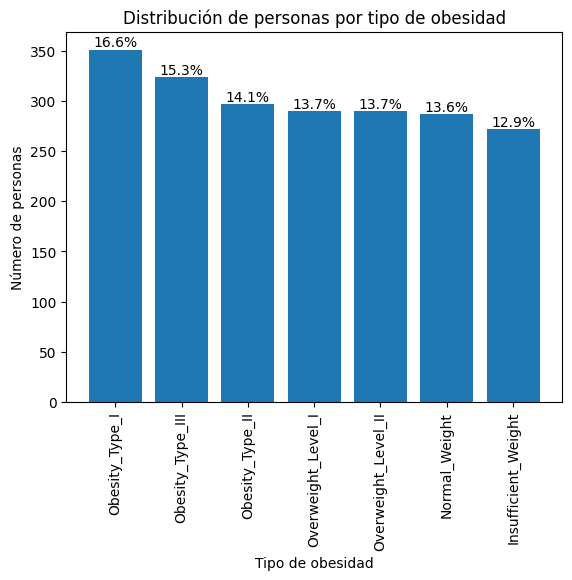

In [ ]:
conteo = df["NivelDeObesidad"].value_counts()
total = conteo.sum()

plt.figure()
plt.bar(conteo.index, conteo.values)

for i, valor in enumerate(conteo.values):
    porcentaje = valor / total * 100
    plt.text(i, valor, f"{porcentaje:.1f}%",
             ha="center", va="bottom")

plt.xlabel("Tipo de obesidad")
plt.ylabel("Número de personas")
plt.title("Distribución de personas por tipo de obesidad")
plt.xticks(rotation=90)
plt.show()



Podemos observar las proporciones de personas con los distintos tipos de obesidad, siendo la que mas predomina la obesidad tipo 1

In [ ]:
# graficar la distribucion de personas con tipo de obesidad por sexo
tabla = pd.crosstab(df["NivelDeObesidad"], df["Sexo"])
tabla

Sexo,Female,Male
NivelDeObesidad,,
Insufficient_Weight,173,99
Normal_Weight,141,146
Obesity_Type_I,156,195
Obesity_Type_II,2,295
Obesity_Type_III,323,1
Overweight_Level_I,145,145
Overweight_Level_II,103,187


Ciertos conteos parecen estar sesgados, especialmente en la obesidad tipo 2 y 3

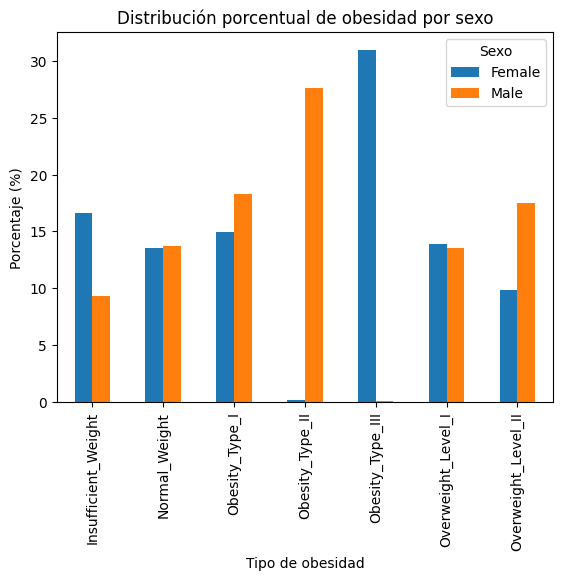

In [ ]:
tabla_pct = pd.crosstab(df["NivelDeObesidad"], df["Sexo"], normalize="columns") * 100
tabla_pct.plot(kind="bar")

plt.xlabel("Tipo de obesidad")
plt.ylabel("Porcentaje (%)")
plt.title("Distribución porcentual de obesidad por sexo")
plt.show()

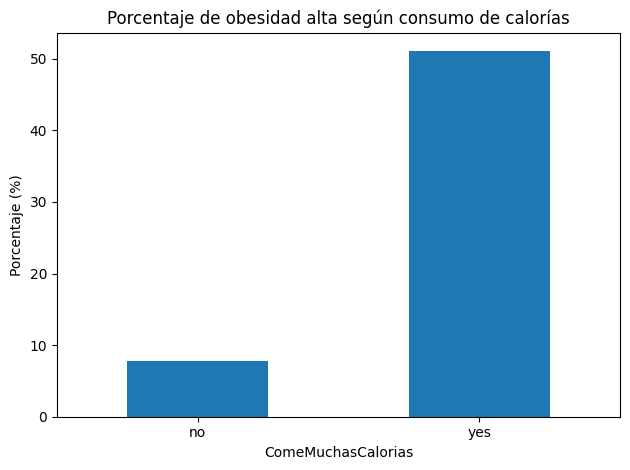

In [ ]:
tabla_simple[True].plot(kind="bar")

plt.ylabel("Porcentaje (%)")
plt.title("Porcentaje de obesidad alta según consumo de calorías")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Esto indica que como se esperaba, las personas que tienden a comer muchas calorias, presentan un porcentaje de obesidad mas elevado que los demas

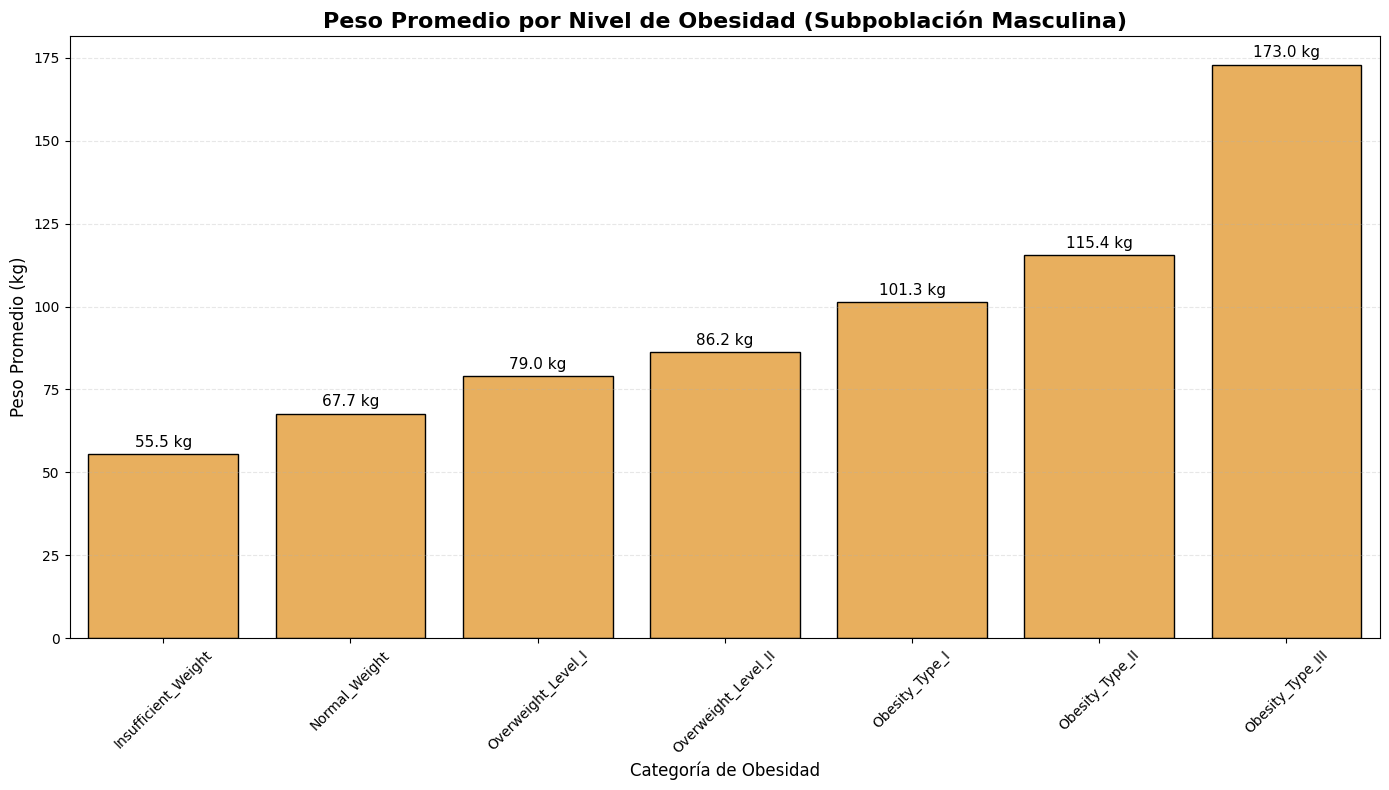

In [68]:
# Establecer dataframe de hombres
df_hombres = df[df['Sexo'] == 'Male']

# Configuración del tamaño
plt.figure(figsize=(14, 8))

# Orden de las categorías
orden_niveles = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# 2. CREAR EL GRÁFICO (Usando solo df_hombres)
ax = sns.barplot(
    data=df_hombres,       # Usamos el dataframe filtrado
    x='NivelDeObesidad',        # Asegúrate que este sea el nombre real de tu columna
    y='Peso',            # Variable de peso
    order=orden_niveles,
    color='#ffb347',       # Un color naranja pastel (o usa palette='Oranges')
    errorbar=None,
    edgecolor='black'
)

# Poner los números arriba de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f kg', padding=3, fontsize=11)

# Títulos y Etiquetas
plt.title('Peso Promedio por Nivel de Obesidad (Subpoblación Masculina)', fontsize=16, fontweight='bold')
plt.xlabel('Categoría de Obesidad', fontsize=12)
plt.ylabel('Peso Promedio (kg)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

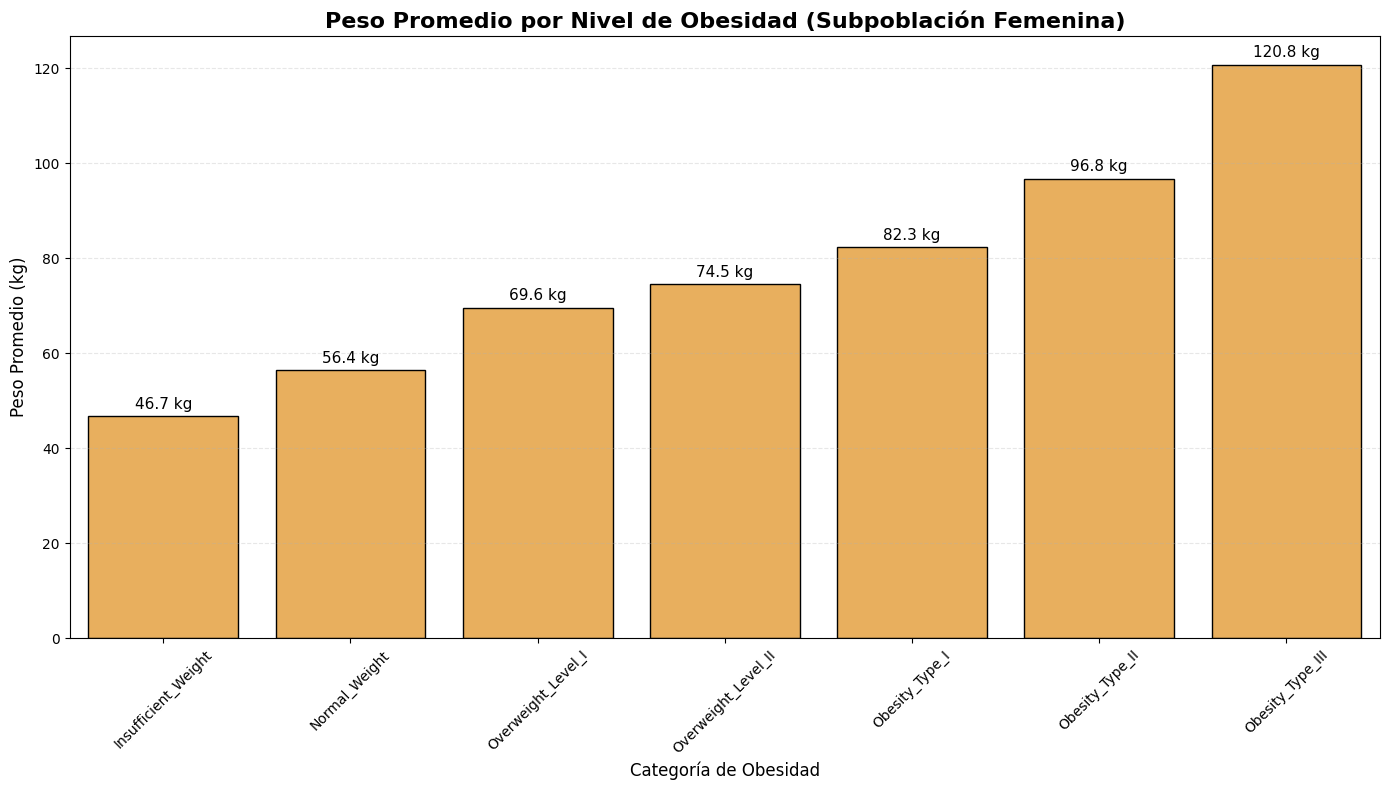

In [70]:
# Definir Datos de mujeres
df_mujeres = df[df['Sexo'] == 'Female']

# Configuración del tamaño
plt.figure(figsize=(14, 8))

# Orden de las categorías
orden_niveles = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# 2. CREAR EL GRÁFICO (Usando solo df_hombres)
ax = sns.barplot(
    data=df_mujeres,       # Usamos el dataframe filtrado
    x='NivelDeObesidad',        # Asegúrate que este sea el nombre real de tu columna
    y='Peso',            # Variable de peso
    order=orden_niveles,
    color='#ffb347',       # Un color naranja pastel (o usa palette='Oranges')
    errorbar=None,
    edgecolor='black'
)

# Poner los números arriba de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f kg', padding=3, fontsize=11)

# Títulos y Etiquetas
plt.title('Peso Promedio por Nivel de Obesidad (Subpoblación Femenina)', fontsize=16, fontweight='bold')
plt.xlabel('Categoría de Obesidad', fontsize=12)
plt.ylabel('Peso Promedio (kg)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

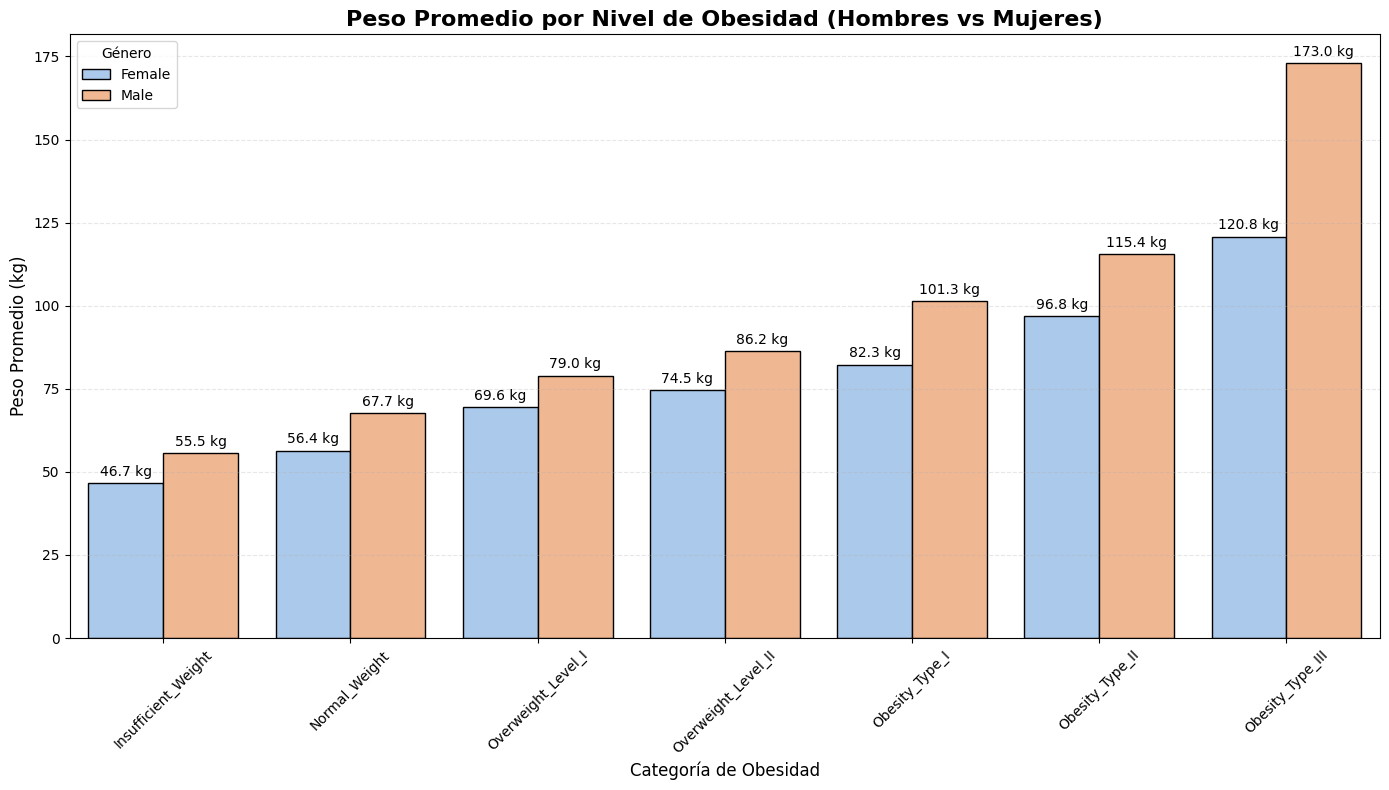

In [ ]:
# Configuración del tamaño
plt.figure(figsize=(14, 8))

# Orden de las categorías
orden_niveles = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# CREAR EL GRÁFICO DE BARRAS
# estimator=np.mean le dice que calcule el PROMEDIO de peso automáticamente
ax = sns.barplot(
    data=df,
    x='NivelDeObesidad',
    y='Peso',
    hue='Sexo',
    order=orden_niveles,
    palette='pastel',
    errorbar=None,  # Quitamos las líneas de error para que se vea más limpio aún
    edgecolor='black' # Borde negro para que se definan bien las barras
)

# Poner numeros arriba de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f kg', padding=3, fontsize=10)

# Títulos y Etiquetas amigables
plt.title('Peso Promedio por Nivel de Obesidad (Hombres vs Mujeres)', fontsize=16, fontweight='bold')
plt.xlabel('Categoría de Obesidad', fontsize=12)
plt.ylabel('Peso Promedio (kg)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()